In [19]:
from common import setup_imports
from constants import *
import os

setup_imports()

from pipeline import Pipeline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



utils.load_config:: Loaded config from /home/automatedtomato/github.com/automatedtomato/sar-yolo/config/006.yaml

utils.load_config:: Validated config: {'model': {'name': 'yolov3_sample_006', 'input_size': 480, 'n_classes': 0, 'grid_sizes': [15, 30, 60], 'anchors': [[[42.0, 27.0], [34.0, 57.0], [64.0, 35.0]], [[13.0, 25.0], [28.0, 20.0], [21.0, 38.0]], [[4.0, 6.0], [8.0, 14.0], [17.0, 13.0]]]}, 'data': {'bucket_name': 'sar-dataset', 'img_ext': '.png', 'annot_ext': '.txt', 'test': {'img_path': 'data/new_dataset3/test/images', 'annot_path': 'data/new_dataset3/test/labels'}, 'train': {'img_path': 'data/new_dataset3/train/images', 'annot_path': 'data/new_dataset3/train/labels'}, 'val': {'img_path': 'data/new_dataset3/val/images', 'annot_path': 'data/new_dataset3/val/labels'}, 'data_dir': '/home/automatedtomato/github.com/automatedtomato/sar-yolo/sar_dataset', 'source': 'file'}, 'dataloader': {'batch_size': 8, 'num_workers': 4, 'pin_memory': True}, 'training': {'log_interval': 10, 'accumul


utils.load_config:: Loaded config from /home/automatedtomato/github.com/automatedtomato/sar-yolo/config/006.yaml

utils.anchor_optim:: Anchor optimizer initialized

utils.anchor_optim:: Collecting bounding box dimensions for train dataset...

utils.anchor_optim:: 
Running K-means clustering with 9 clusters...
Box dimensions statistics:
  Mean: [15.44649435 17.43246526]
  STD: [13.84508683 12.25266142]
  Min: [0.09264 0.1608 ]
  Max: [210.73152 139.28064]

Calculated anchors:
  Scale 0: [[43.0, 28.0], [34.0, 58.0], [64.0, 35.0]]
  Scale 1: [[13.0, 25.0], [29.0, 21.0], [21.0, 38.0]]
  Scale 2: [[4.0, 6.0], [8.0, 14.0], [18.0, 13.0]]

utils.anchor_optim:: Updated anchors in config file: /home/automatedtomato/github.com/automatedtomato/sar-yolo/config/006.yaml

utils.load_config:: Loaded config from /home/automatedtomato/github.com/automatedtomato/sar-yolo/config/006.yaml

data.dataset.data_loader:: Train Samples: 919, Val Samples: 306, Test Samples: 306

pipeline.pipeline:: Data transfor

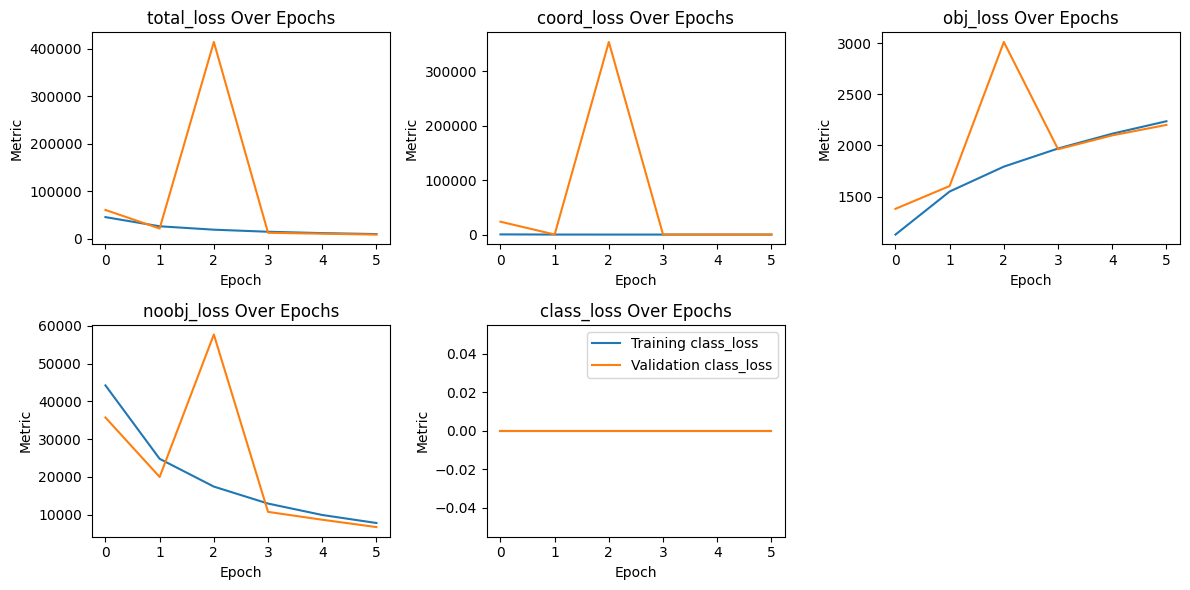


models.train_val.evaluation:: YOLOv3 evaluator initialized.

models.train_val.evaluation:: Evaluating model...


KeyError: 'csv_path'

In [20]:
pl = Pipeline(config_path=os.path.join(CONFIG_PATH, '006.yaml'))
metrics, model = pl.train_val_pipeline(optim_anchor=True, schedule_lr=True)

In [22]:
from models.train_val.evaluation import YOLOv3Evaluator
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
evaluator = YOLOv3Evaluator(device=device, config_path=os.path.join(CONFIG_PATH, '006.yaml'))

metrics, _ = evaluator.evaluate_saved_model(
    saved_model_path='006_best_model.pt'
)
metrics


utils.load_config:: Loaded config from /home/automatedtomato/github.com/automatedtomato/sar-yolo/config/006.yaml

models.train_val.evaluation:: YOLOv3 evaluator initialized.

models.train_val.evaluation:: Loaded saved model from 006_best_model.pt

models.train_val.evaluation:: Model loaded

utils.data_stream:: Connected to directory: /home/automatedtomato/github.com/automatedtomato/sar-yolo/sar_dataset

data.dataset.data_loader:: Train Samples: 6129, Val Samples: 2043, Test Samples: 2043

models.train_val.evaluation:: Evaluating model...


{'model': 'yolov3_sample_006',
 'n_epochs': 6,
 'learning_rate': 0.001,
 'weight_decay': 0.0005,
 'batch_size': 8,
 'accumulation_steps': 2,
 'total_loss': 9397.0373,
 'mAP': np.float64(0.003),
 'mAP_0.3': np.float64(0.003),
 'precision': 0.011,
 'recall': 0.0,
 'recall_0.3': 0.0,
 'IoU': 0.6253,
 'f1_score': 0.0,
 'n_preds': 91,
 'n_ground_truths': 211233}

### Saving metrics test

In [91]:
metrics.pop('datetime')
metrics

{'model': 'yolov3_sample_006',
 'n_epochs': 1,
 'learning_rate': 0.01,
 'weight_decay': 0.0005,
 'batch_size': 8,
 'accumulation_steps': 1,
 'total_loss': 4079.8857,
 'mAP': 0.0,
 'mAP_0.3': 0.0,
 'precision': 0.0,
 'recall': 0.0,
 'recall_0.3': 0.0,
 'IoU': 0.0,
 'f1_score': 0.0,
 'n_preds': 0,
 'n_ground_truths': 41818}

In [85]:
import pandas as pd
df = pd.read_csv('../metrics/metrics.csv')
df

,datetime,model,n_epochs,learning_rate,weight_decay,batch_size,accumulation_steps,total_loss,mAP,mAP_0.3,precision,recall,recall_0.3,IoU,f1_score,n_preds,n_ground_truths
0,2025-06-10 16:04:58,sample,1,0.01,0.0005,8,1,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,40000


In [86]:
from datetime import datetime
metrics['datetime'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
metrics

{'model': 'yolov3_sample_006',
 'n_epochs': 1,
 'learning_rate': 0.01,
 'weight_decay': 0.0005,
 'batch_size': 8,
 'accumulation_steps': 1,
 'total_loss': 4079.8857,
 'mAP': 0.0,
 'mAP_0.3': 0.0,
 'precision': 0.0,
 'recall': 0.0,
 'recall_0.3': 0.0,
 'IoU': 0.0,
 'f1_score': 0.0,
 'n_preds': 0,
 'n_ground_truths': 41818,
 'datetime': '2025-06-10 17:21:14'}

In [87]:
metrics_df = pd.DataFrame(metrics, index=[0])
metrics_df

,model,n_epochs,learning_rate,weight_decay,batch_size,accumulation_steps,total_loss,mAP,mAP_0.3,precision,recall,recall_0.3,IoU,f1_score,n_preds,n_ground_truths,datetime
0,yolov3_sample_006,1,0.01,0.0005,8,1,4079.8857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,41818,2025-06-10 17:21:14


In [88]:
metrics_df = metrics_df[['datetime'] + [col for col in metrics_df.columns if col != 'datetime']]
metrics_df

,datetime,model,n_epochs,learning_rate,weight_decay,batch_size,accumulation_steps,total_loss,mAP,mAP_0.3,precision,recall,recall_0.3,IoU,f1_score,n_preds,n_ground_truths
0,2025-06-10 17:21:14,yolov3_sample_006,1,0.01,0.0005,8,1,4079.8857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,41818


In [89]:
df = pd.read_csv('../metrics/metrics.csv')
df

,datetime,model,n_epochs,learning_rate,weight_decay,batch_size,accumulation_steps,total_loss,mAP,mAP_0.3,precision,recall,recall_0.3,IoU,f1_score,n_preds,n_ground_truths
0,2025-06-10 16:04:58,sample,1,0.01,0.0005,8,1,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,40000


In [90]:
merged = pd.concat([metrics_df, df], ignore_index=True)
merged

,datetime,model,n_epochs,learning_rate,weight_decay,batch_size,accumulation_steps,total_loss,mAP,mAP_0.3,precision,recall,recall_0.3,IoU,f1_score,n_preds,n_ground_truths
0,2025-06-10 17:21:14,yolov3_sample_006,1,0.01,0.0005,8,1,4079.8857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,41818
1,2025-06-10 16:04:58,sample,1,0.01,0.0005,8,1,5000.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,40000


In [92]:
from utils import update_metrics_csv
update_metrics_csv('../metrics/metrics.csv', metrics, backup=False, save=False)

,datetime,model,n_epochs,learning_rate,weight_decay,batch_size,accumulation_steps,total_loss,mAP,mAP_0.3,precision,recall,recall_0.3,IoU,f1_score,n_preds,n_ground_truths
0,2025-06-10 17:24:00,yolov3_sample_006,1,0.01,0.0005,8,1,4079.8857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,41818
1,2025-06-10 16:04:58,sample,1,0.01,0.0005,8,1,5000.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,40000


### Multimodelling

In [11]:
from datetime import datetime
import pandas as pd
metrics['datetime'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
m_df = pd.DataFrame(metrics, index=[0])
m_df


,model,n_epochs,learning_rate,weight_decay,batch_size,accumulation_steps,total_loss,mAP,mAP_0.3,precision,recall,recall_0.3,IoU,f1_score,n_preds,n_ground_truths,datetime
0,yolov3_sample_006,5,0.001,0.0005,8,1,8111.8079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,211254,2025-06-11 13:23:27


In [12]:
m_df = m_df[['datetime'] + [col for col in m_df.columns if col != 'datetime']]
m_df

,datetime,model,n_epochs,learning_rate,weight_decay,batch_size,accumulation_steps,total_loss,mAP,mAP_0.3,precision,recall,recall_0.3,IoU,f1_score,n_preds,n_ground_truths
0,2025-06-11 13:23:27,yolov3_sample_006,5,0.001,0.0005,8,1,8111.8079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,211254


In [13]:
m_df.to_csv('../metrics/metrics.csv', index=False)

In [14]:
o_df = pd.read_csv('../metrics/metrics.csv')
o_df

,datetime,model,n_epochs,learning_rate,weight_decay,batch_size,accumulation_steps,total_loss,mAP,mAP_0.3,precision,recall,recall_0.3,IoU,f1_score,n_preds,n_ground_truths
0,2025-06-11 13:23:27,yolov3_sample_006,5,0.001,0.0005,8,1,8111.8079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,211254


In [15]:
o_df = pd.concat([o_df, m_df], ignore_index=True)
o_df

,datetime,model,n_epochs,learning_rate,weight_decay,batch_size,accumulation_steps,total_loss,mAP,mAP_0.3,precision,recall,recall_0.3,IoU,f1_score,n_preds,n_ground_truths
0,2025-06-11 13:23:27,yolov3_sample_006,5,0.001,0.0005,8,1,8111.8079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,211254
1,2025-06-11 13:23:27,yolov3_sample_006,5,0.001,0.0005,8,1,8111.8079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,211254
